In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import spectrai as spa

sns.set_context('notebook')
%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [2]:
### O. Utilities functions
def get_analyte(y, names, name):
    list(y_names).index(name)
    return y[:,list(y_names).index(name)]

In [3]:
DATA_PATH = os.path.join('..', 'data')
VIETNAM_PATH =  os.path.join('vnm-petra', 'mir-models')
DATA_URL = os.path.join(DATA_PATH, VIETNAM_PATH, '*.*')
VIETNAM_MEAS_URL = os.path.join(DATA_PATH, 'vnm-petra', 'mir-models', '20090215-soil-database-mirs.xls')

X, X_names, y, y_names, instances_id, _ = spa.load_data_petra(DATA_URL, VIETNAM_MEAS_URL)
print('X shape: ', X.shape)
print(X_names)
print(y_names)
print(instances_id)

X shape:  (130, 1763)
[3997.76734131 3995.83884766 3993.910354   ...  603.61851318  601.69001953
  599.76152588]
['TC' 'TOC' 'TIC' 'TN' 'CEC' 'K' 'FCAVER' 'FCIAVER' 'FSAAVER']
['Av001' 'Av003' 'Av005' 'Av008' 'Av013' 'Av014' 'Av018' 'Av020' 'Av023'
 'Av026' 'Av027' 'Av032' 'Av036' 'Av038' 'Av040' 'Av041' 'Av042' 'Av043'
 'Av045' 'Av048' 'Av051' 'Av057' 'Av061' 'Av062' 'Av063' 'Av064' 'Av065'
 'Av067' 'Av069' 'Av072' 'Av077' 'Av080' 'Av083' 'Av086' 'Av092' 'Av098'
 'Av100' 'Av102' 'Av105' 'Av106' 'Av108' 'Av110' 'Av113' 'Av121' 'Av127'
 'Av133' 'Av139' 'Av141' 'Av143' 'Av146' 'Av147' 'Av149' 'Av152' 'Av155'
 'Av161' 'Av165' 'Av169' 'Av171' 'Av174' 'Av175' 'Av177' 'Av180' 'Av183'
 'Av189' 'Av195' 'Av203' 'Av205' 'Av208' 'Av209' 'Av211' 'Av214' 'Av217'
 'Av225' 'Av226' 'Av235' 'Av239' 'Av242' 'Av244' 'Av246' 'Av247' 'Av249'
 'Av252' 'Av255' 'Av261' 'Av265' 'Av267' 'Av268' 'Av272' 'Av365' 'Av366'
 'Av367' 'Av368' 'Av369' 'Av370' 'Av371' 'Av372' 'Av373' 'Av374' 'Av375'
 'Av376' 'Av377' 'Av3

In [5]:
X.shape

(130, 1763)

In [8]:
y_names

array(['TC', 'TOC', 'TIC', 'TN', 'CEC', 'K', 'FCAVER', 'FCIAVER',
       'FSAAVER'], dtype=object)

In [6]:
y.shape

(130, 9)

In [7]:
np.c_[X,y].shape

(130, 1772)

In [21]:
a = np.array([[1,2,3],[4,5,6],[0,0,1]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [0, 0, 1]])

In [16]:
a[:,2].argsort()

array([2, 0, 1])

In [18]:
a[a[:,0].argsort()]

array([[0, 0, 1],
       [1, 2, 3],
       [4, 5, 6]])

In [31]:
def sort_ndarray(ndarray, by=0):
    idx = ndarray[:,by].argsort()
    ndarray_new = np.copy(ndarray)
    return ndarray_new[idx]

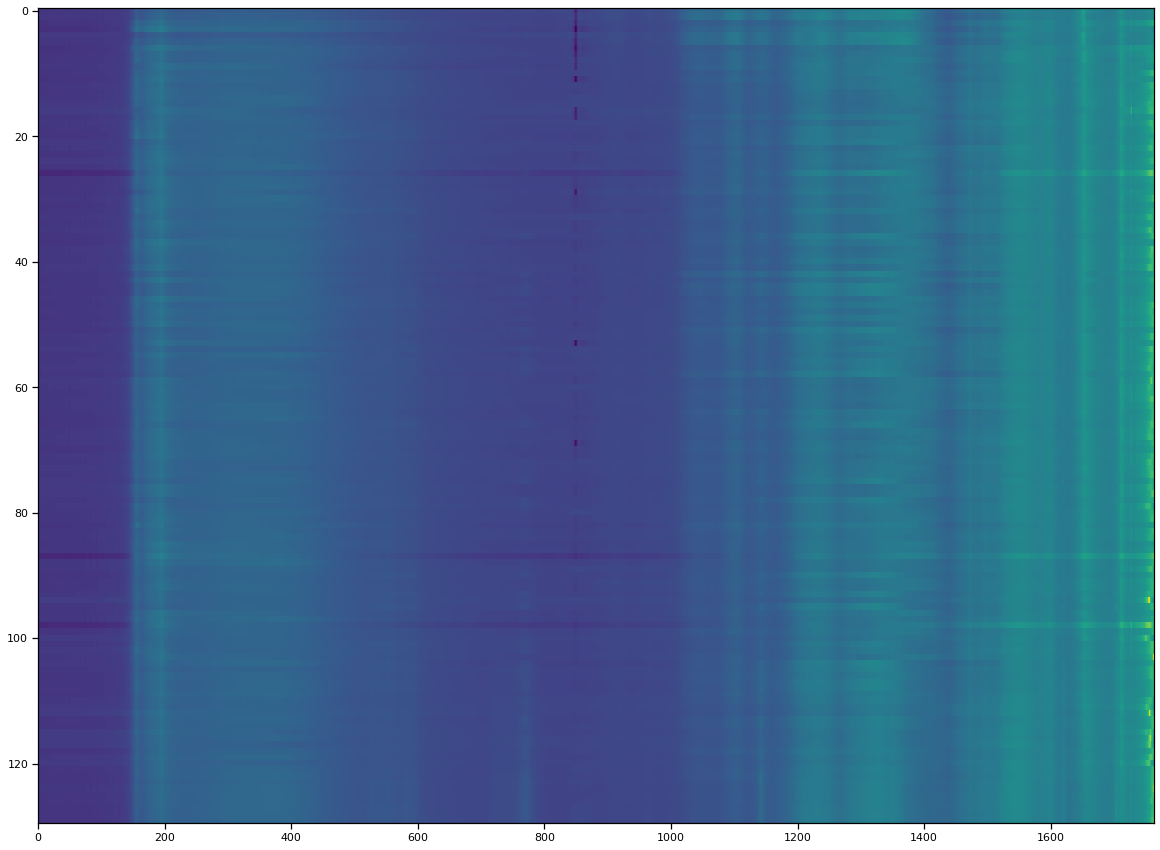

In [62]:
sorted_ndarray = sort_ndarray(np.c_[X,y], 1763)[:,:1763]

fig, ax = plt.subplots(figsize=(20,15))
_ = ax.imshow(sorted_ndarray, aspect='auto')